In [2]:
import pandas as pd
import numpy as np
from clases.Trainer import Trainer
from clases.NeuronalNetwork import NeuronalNetwork
from clases.ActivationFunction import *
from clases.Optimizer import *
from clases.LossFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

## MNIST Data

### Load Data

In [3]:
# URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

### Split Data

In [4]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [5]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

with learning rate 0.1

In [5]:
optimizer = SGDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  3.97s | val loss 0.314 | valid accuracy 0.198 |
--------------------------------------------------------------------
| Epoch  20 | time:  4.08s | val loss 0.125 | valid accuracy 0.830 |
--------------------------------------------------------------------
| Epoch  40 | time:  3.63s | val loss 0.087 | valid accuracy 0.871 |
--------------------------------------------------------------------
| Epoch  60 | time:  3.58s | val loss 0.073 | valid accuracy 0.889 |
--------------------------------------------------------------------
| Epoch  80 | time:  4.05s | val loss 0.065 | valid accuracy 0.898 |
--------------------------------------------------------------------
| Epoch 100 | time:  4.32s | val loss 0.060 | valid accuracy 0.906 |
--------------------------------------------------------------------
| Epoch 120 | time:  3.67s | val loss 0.057 | valid accuracy 0.910 |
----------------------------------

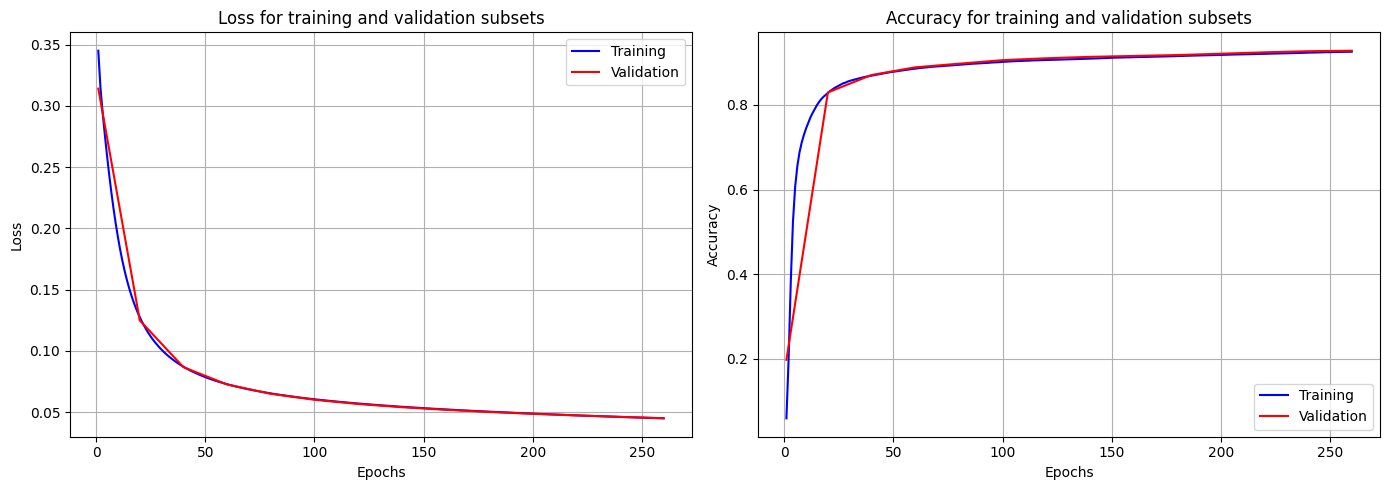

In [6]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [7]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9235714285714286


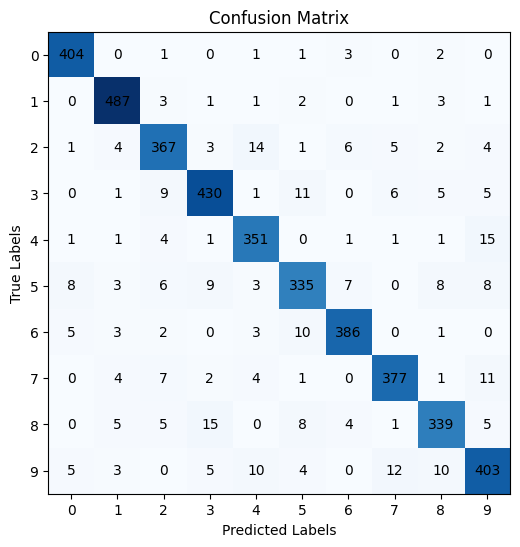

In [8]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

#### Setup NN

In [9]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

with learning rate 0.001

In [10]:
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  3.93s | val loss 0.295 | valid accuracy 0.376 |
--------------------------------------------------------------------
| Epoch  20 | time:  3.80s | val loss 0.058 | valid accuracy 0.903 |
--------------------------------------------------------------------
| Epoch  40 | time:  4.00s | val loss 0.041 | valid accuracy 0.932 |
--------------------------------------------------------------------
| Epoch  60 | time:  3.82s | val loss 0.033 | valid accuracy 0.946 |
--------------------------------------------------------------------
| Epoch  80 | time:  3.92s | val loss 0.028 | valid accuracy 0.957 |
--------------------------------------------------------------------
| Epoch 100 | time:  3.85s | val loss 0.024 | valid accuracy 0.961 |
--------------------------------------------------------------------
| Epoch 120 | time:  3.84s | val loss 0.022 | valid accuracy 0.965 |
----------------------------------

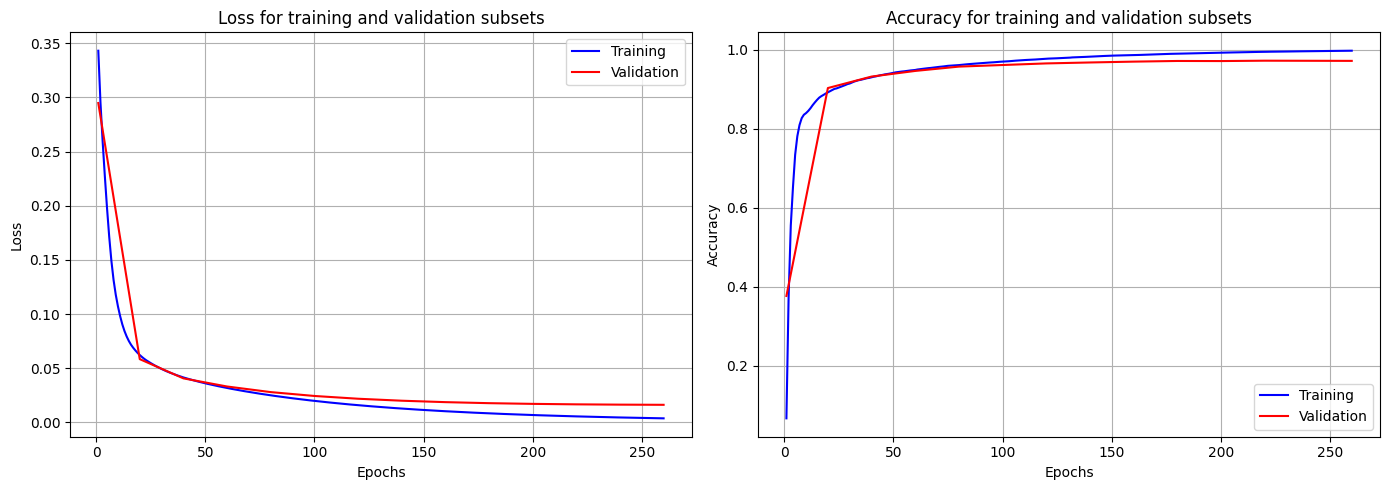

In [11]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [12]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9723809523809523


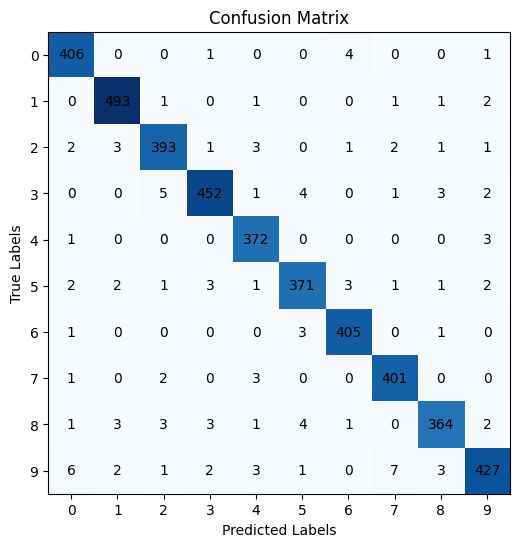

In [13]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

with learning rate 0.01

In [19]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  3.82s | val loss 0.234 | valid accuracy 0.610 |
--------------------------------------------------------------------
| Epoch  20 | time:  4.15s | val loss 0.039 | valid accuracy 0.933 |
--------------------------------------------------------------------
| Epoch  40 | time:  4.50s | val loss 0.023 | valid accuracy 0.962 |
--------------------------------------------------------------------
| Epoch  60 | time:  4.40s | val loss 0.018 | valid accuracy 0.971 |
--------------------------------------------------------------------
| Epoch  80 | time:  4.33s | val loss 0.016 | valid accuracy 0.975 |
--------------------------------------------------------------------
| Epoch 100 | time:  4.10s | val loss 0.016 | valid accuracy 0.974 |
--------------------------------------------------------------------
| Epoch 120 | time:  4.85s | val loss 0.017 | valid accuracy 0.975 |
----------------------------------

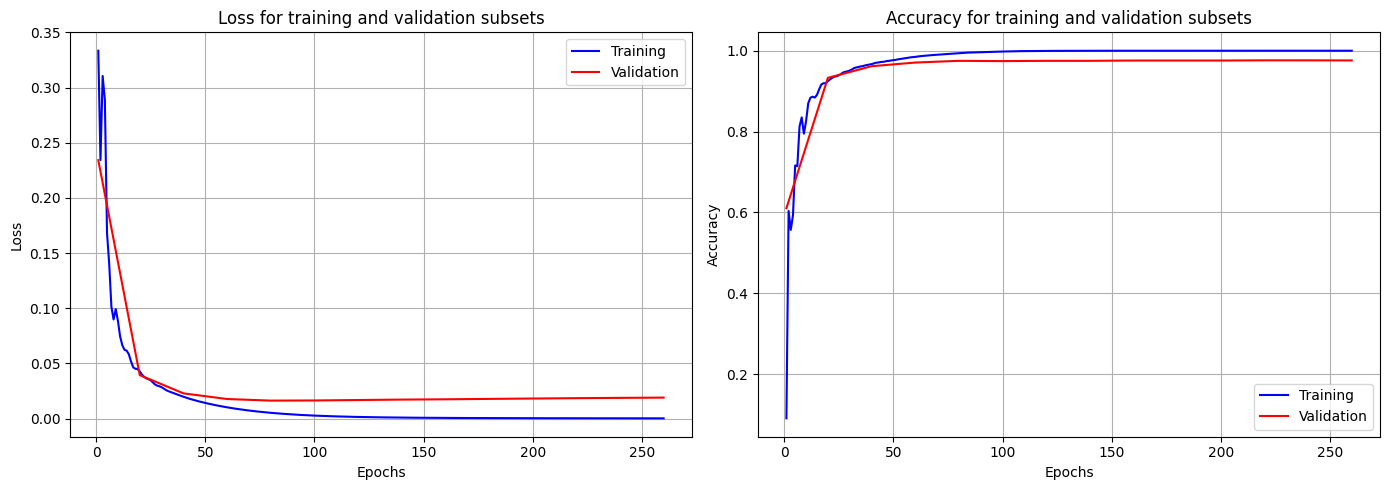

In [20]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [21]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9738095238095238


with learning rate 0.005

In [6]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=20, print_every=4)

--------------------------------------------------------------------
| Epoch   1 | time:  3.70s | val loss 0.253 | valid accuracy 0.464 |
--------------------------------------------------------------------
| Epoch   4 | time:  4.63s | val loss 0.126 | valid accuracy 0.735 |
--------------------------------------------------------------------
| Epoch   8 | time:  4.28s | val loss 0.080 | valid accuracy 0.857 |
--------------------------------------------------------------------
| Epoch  12 | time:  5.43s | val loss 0.059 | valid accuracy 0.900 |
--------------------------------------------------------------------
| Epoch  16 | time:  5.15s | val loss 0.051 | valid accuracy 0.911 |
--------------------------------------------------------------------
| Epoch  20 | time:  5.20s | val loss 0.045 | valid accuracy 0.922 |
--------------------------------------------------------------------


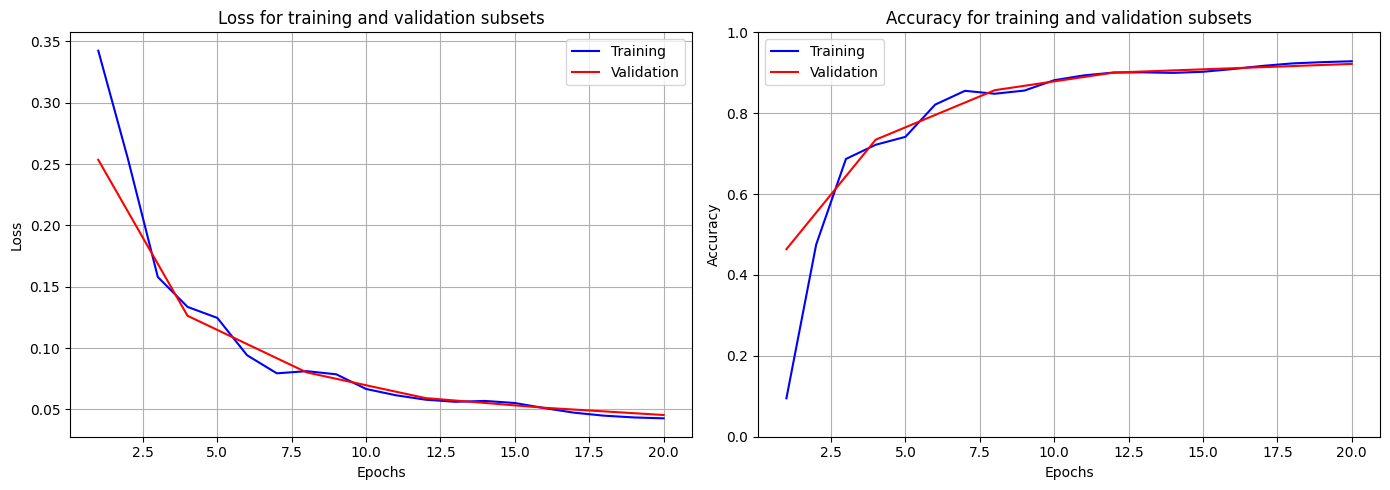

In [7]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [8]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9266666666666666


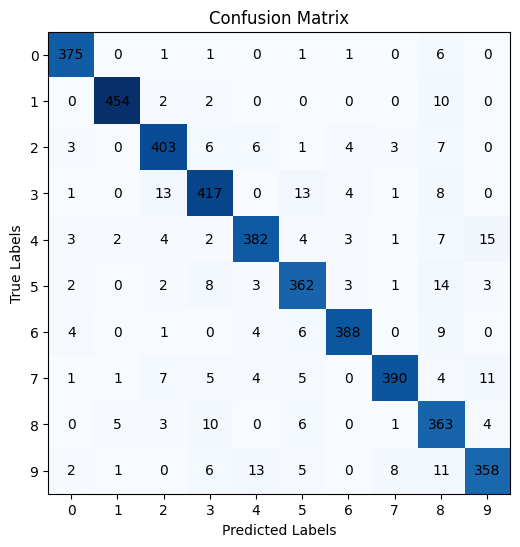

In [9]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

with learning rate 0.05

In [17]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.05)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=5)

--------------------------------------------------------------------
| Epoch   1 | time:  4.04s | val loss 1.524 | valid accuracy 0.294 |
--------------------------------------------------------------------
| Epoch   5 | time:  4.89s | val loss 2.836 | valid accuracy 0.193 |
--------------------------------------------------------------------
| Epoch  10 | time:  4.40s | val loss 2.984 | valid accuracy 0.294 |
--------------------------------------------------------------------
| Epoch  15 | time:  4.27s | val loss 3.072 | valid accuracy 0.292 |
--------------------------------------------------------------------
| Epoch  20 | time:  7.87s | val loss 2.962 | valid accuracy 0.304 |
--------------------------------------------------------------------
| Epoch  25 | time:  7.85s | val loss 2.624 | valid accuracy 0.305 |
--------------------------------------------------------------------
| Epoch  30 | time:  4.55s | val loss 3.574 | valid accuracy 0.214 |
----------------------------------

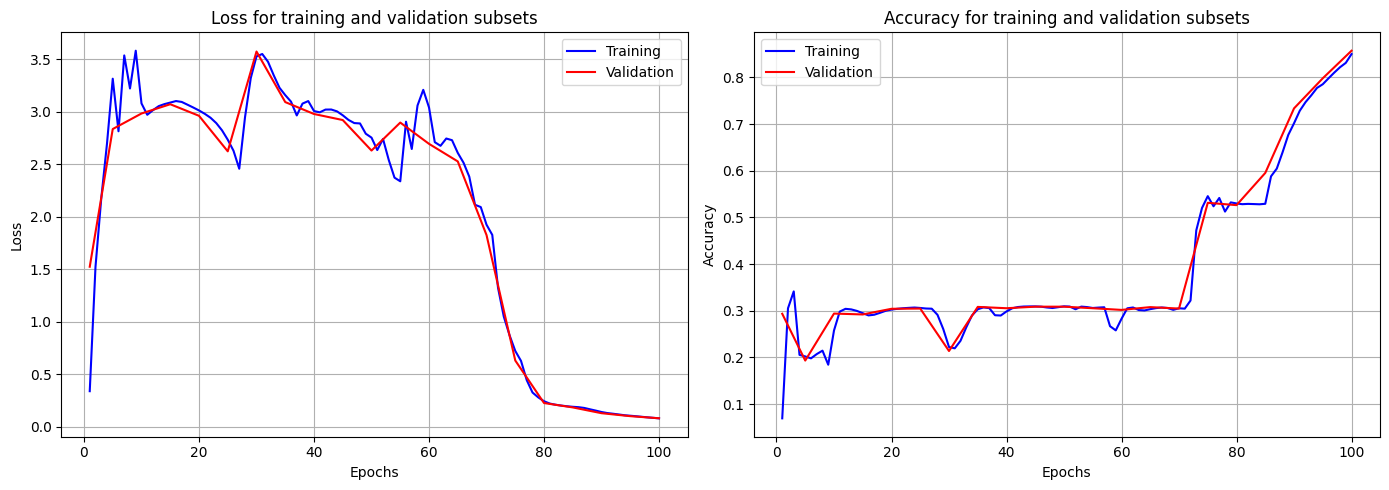

In [18]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [ ]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

In [ ]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

## Fashion MNIST Data

### Load Data

In [10]:
# URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist/data
data1 = pd.read_csv('../datos/fashion-mnist_train.csv')
data2 = pd.read_csv('../datos/fashion-mnist_test.csv')
data = pd.concat([data1, data2])
data = np.array(data)

In [11]:
labels = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Split Data

In [12]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [13]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

In [15]:
optimizer = SGDOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  6.98s | val loss 0.173 | valid accuracy 0.650 |
--------------------------------------------------------------------
| Epoch  10 | time: 10.69s | val loss 0.167 | valid accuracy 0.656 |
--------------------------------------------------------------------
| Epoch  20 | time:  6.77s | val loss 0.162 | valid accuracy 0.664 |
--------------------------------------------------------------------
| Epoch  30 | time: 10.61s | val loss 0.157 | valid accuracy 0.673 |
--------------------------------------------------------------------
| Epoch  40 | time: 10.73s | val loss 0.153 | valid accuracy 0.683 |
--------------------------------------------------------------------
| Epoch  50 | time: 10.63s | val loss 0.150 | valid accuracy 0.692 |
--------------------------------------------------------------------
| Epoch  60 | time: 10.71s | val loss 0.147 | valid accuracy 0.700 |
----------------------------------

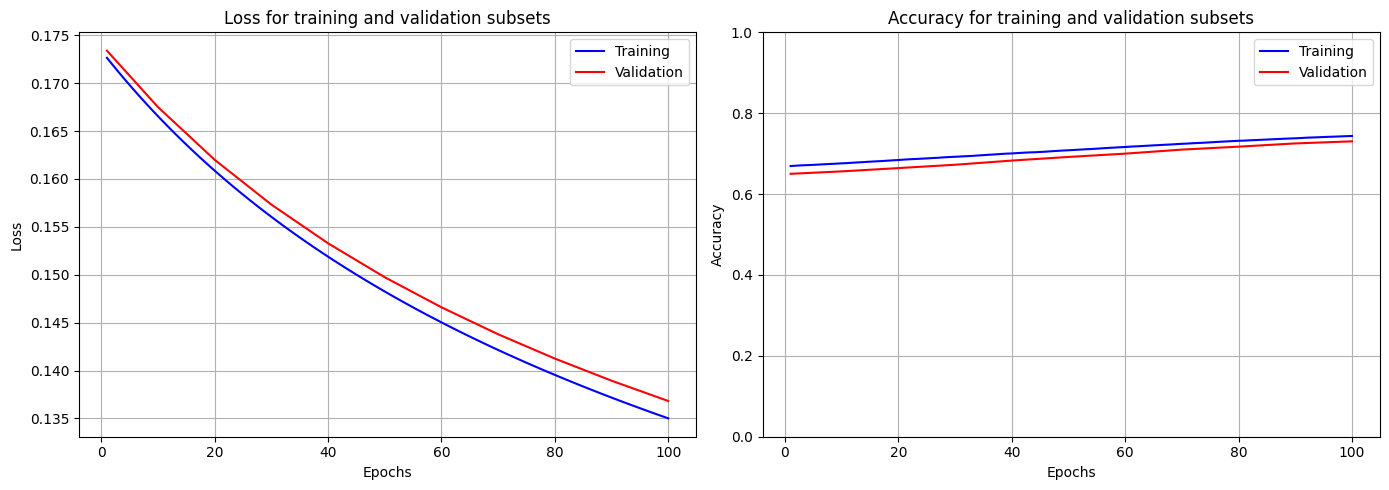

In [16]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [17]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7347142857142858


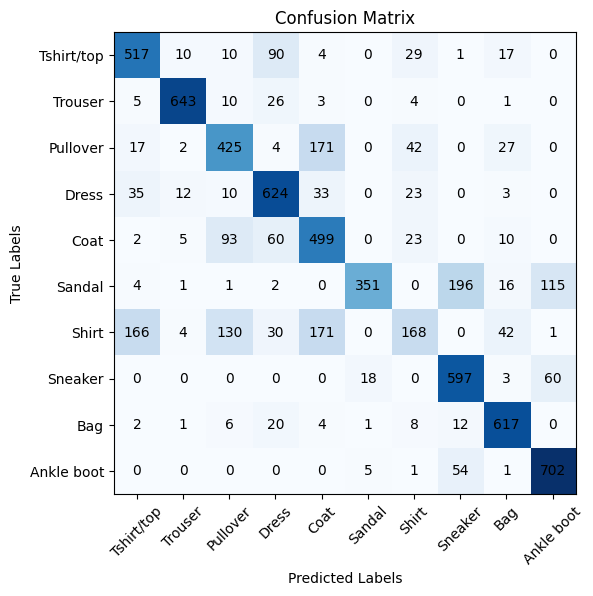

In [18]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)

#### Setup NN

In [19]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

In [20]:
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time: 10.50s | val loss 0.279 | valid accuracy 0.347 |
--------------------------------------------------------------------
| Epoch  10 | time:  9.89s | val loss 0.122 | valid accuracy 0.743 |
--------------------------------------------------------------------
| Epoch  20 | time: 13.79s | val loss 0.100 | valid accuracy 0.803 |
--------------------------------------------------------------------
| Epoch  30 | time:  9.80s | val loss 0.088 | valid accuracy 0.822 |
--------------------------------------------------------------------
| Epoch  40 | time:  9.82s | val loss 0.082 | valid accuracy 0.837 |
--------------------------------------------------------------------
| Epoch  50 | time: 23.23s | val loss 0.078 | valid accuracy 0.845 |
--------------------------------------------------------------------
| Epoch  60 | time: 22.87s | val loss 0.075 | valid accuracy 0.850 |
----------------------------------

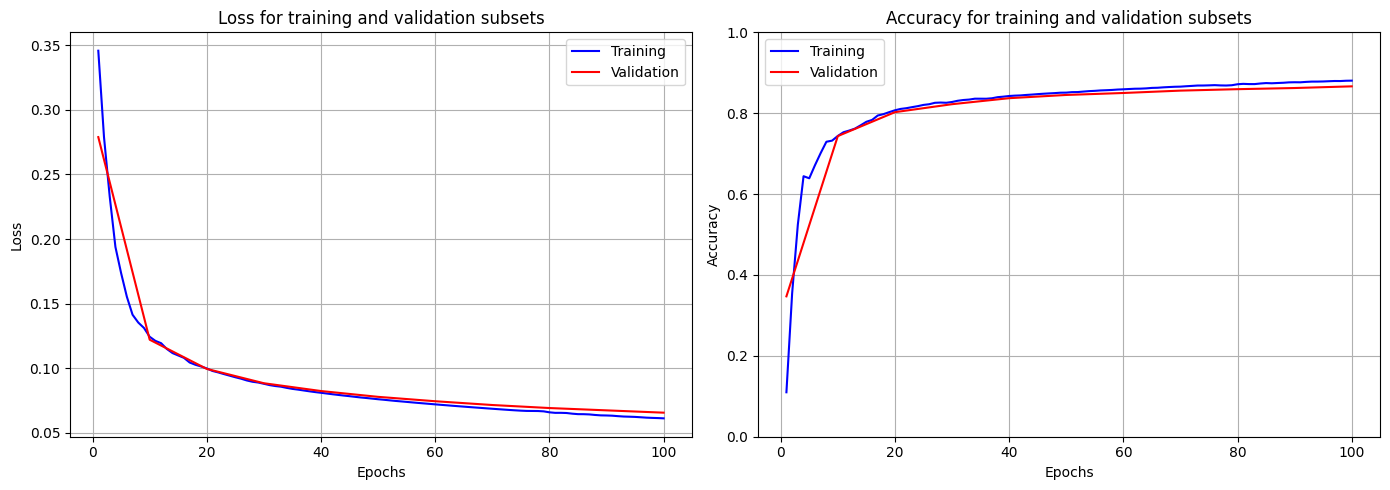

In [21]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [22]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8724285714285714


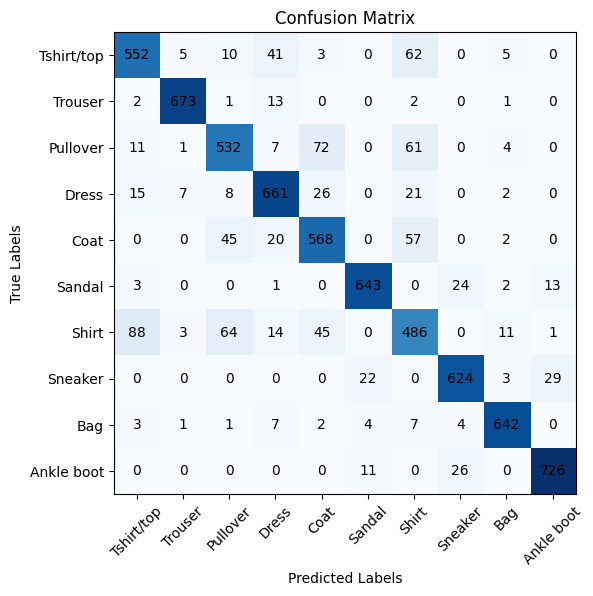

In [23]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)